<a href="https://colab.research.google.com/github/10evoy/university/blob/main/test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# 1. Данные о фруктах: [вес(г), размер(см)]
# Яблоко (0), Апельсин (1), Лимон (2)
X = np.array([
    [150, 7.0],  # Яблоко
    [170, 7.5],  # Яблоко
    [200, 8.0],  # Апельсин
    [220, 8.5],  # Апельсин
    [110, 6.0],  # Лимон
    [120, 6.2]   # Лимон
])
y = np.array([0, 0, 1, 1, 2, 2])

# 2. Создание и обучение модели k-NN
k = 3  # Количество соседей
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# 3. Предсказание для нового фрукта
new_fruit = np.array([[155, 7.2]]) # Вес 155г, размер 7.2см
prediction = knn.predict(new_fruit)

# 4. Вывод результата
fruit_names = {0: 'Яблоко', 1: 'Апельсин', 2: 'Лимон'}
print(f"Новый фрукт с весом 155г и размером 7.2см классифицирован как: {fruit_names[prediction[0]]}")


Новый фрукт с весом 155г и размером 7.2см классифицирован как: Яблоко


In [2]:
import numpy as np

def entropy(y):
    """Вычисляет энтропию Шеннона для набора меток."""
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(X, y, feature_index):
    """
    Вычисляет информационный выигрыш при разделении по признаку feature_index.
    X - двумерный массив признаков, y - массив меток.
    """
    # Энтропия родительского узла
    parent_entropy = entropy(y)

    # Уникальные значения и их индексы для разделяющего признака
    values, indices = np.unique(X[:, feature_index], return_index=True)

    # Взвешенная энтропия дочерних узлов
    weighted_child_entropy = 0
    for i, value in enumerate(values):
        # Находим индексы строк, где признак равен текущему значению
        child_indices = np.where(X[:, feature_index] == value)[0]
        child_y = y[child_indices]

        # Рассчитываем энтропию дочернего узла
        child_entropy = entropy(child_y)
        # Рассчитываем вес (долю) этого дочернего узла
        child_weight = len(child_y) / len(y)

        weighted_child_entropy += child_weight * child_entropy

    # Информационный выигрыш
    return parent_entropy - weighted_child_entropy

# Пример использования
# Данные: [Погода, Температура], Цель: Играть в гольф? (Да/Нет)
# Погода: 0-Солнечно, 1-Облачно, 2-Дождь
# Играть: 1-Да, 0-Нет
data = np.array([
    [0, 85], [0, 80], [1, 83], [2, 70], [2, 68], [2, 65], [1, 64], [0, 72], [0, 69], [2, 75], [1, 75], [1, 72], [2, 81], [0, 71]
])
target = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

ig_weather = information_gain(data, target, 0)
print(f"Информационный выигрыш от разделения по 'Погоде': {ig_weather:.4f}")


Информационный выигрыш от разделения по 'Погоде': 0.4246


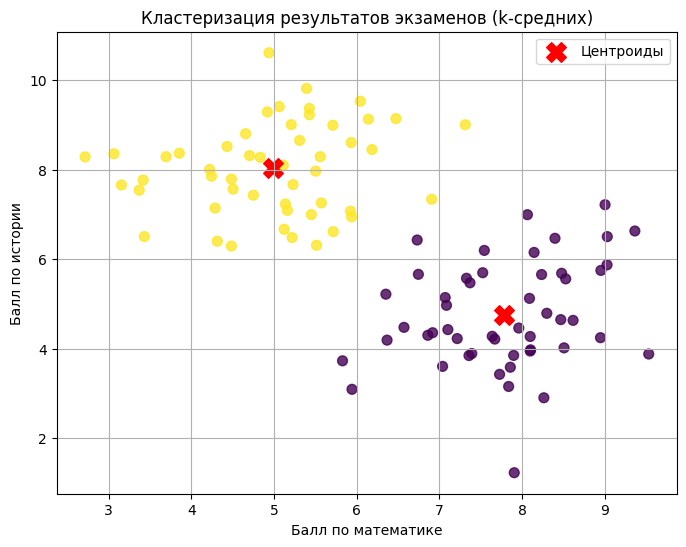

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# 1. Генерируем данные: две группы студентов
# Группа 1: высокие баллы по математике, средние по истории
group1 = np.random.randn(50, 2) + np.array([8, 5])
# Группа 2: средние баллы по математике, высокие по истории
group2 = np.random.randn(50, 2) + np.array([5, 8])

X = np.vstack([group1, group2])

# 2. Создаем и обучаем модель k-средних
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # n_init для подавления предупреждения
kmeans.fit(X)

# 3. Получаем результаты
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# 4. Визуализация
plt.figure(figsize=(8, 6))
# Рисуем точки, раскрашивая их по кластеру
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
# Рисуем центры кластеров
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Центроиды')

plt.title('Кластеризация результатов экзаменов (k-средних)')
plt.xlabel('Балл по математике')
plt.ylabel('Балл по истории')
plt.legend()
plt.grid(True)
plt.show()


Уравнение регрессии: y = 2.00x + 0.04


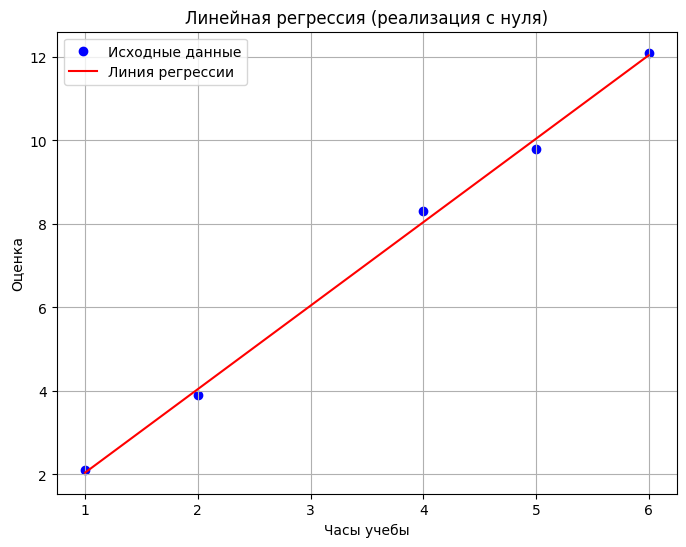

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Данные: часы учебы (X) и оценки (y)
X = np.array([1, 2, 4, 5, 6])
y = np.array([2.1, 3.9, 8.3, 9.8, 12.1])

# 2. Вычисляем средние значения
x_mean = np.mean(X)
y_mean = np.mean(y)

# 3. Вычисляем коэффициенты по методу наименьших квадратов
# Числитель и знаменатель для наклона (m)
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean)**2)
m = numerator / denominator

# Свободный член (b)
b = y_mean - m * x_mean

print(f"Уравнение регрессии: y = {m:.2f}x + {b:.2f}")

# 4. Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Исходные данные')
# Строим линию регрессии
regression_line = m * X + b
plt.plot(X, regression_line, color='red', label='Линия регрессии')
plt.title('Линейная регрессия (реализация с нуля)')
plt.xlabel('Часы учебы')
plt.ylabel('Оценка')
plt.legend()
plt.grid(True)
plt.show()


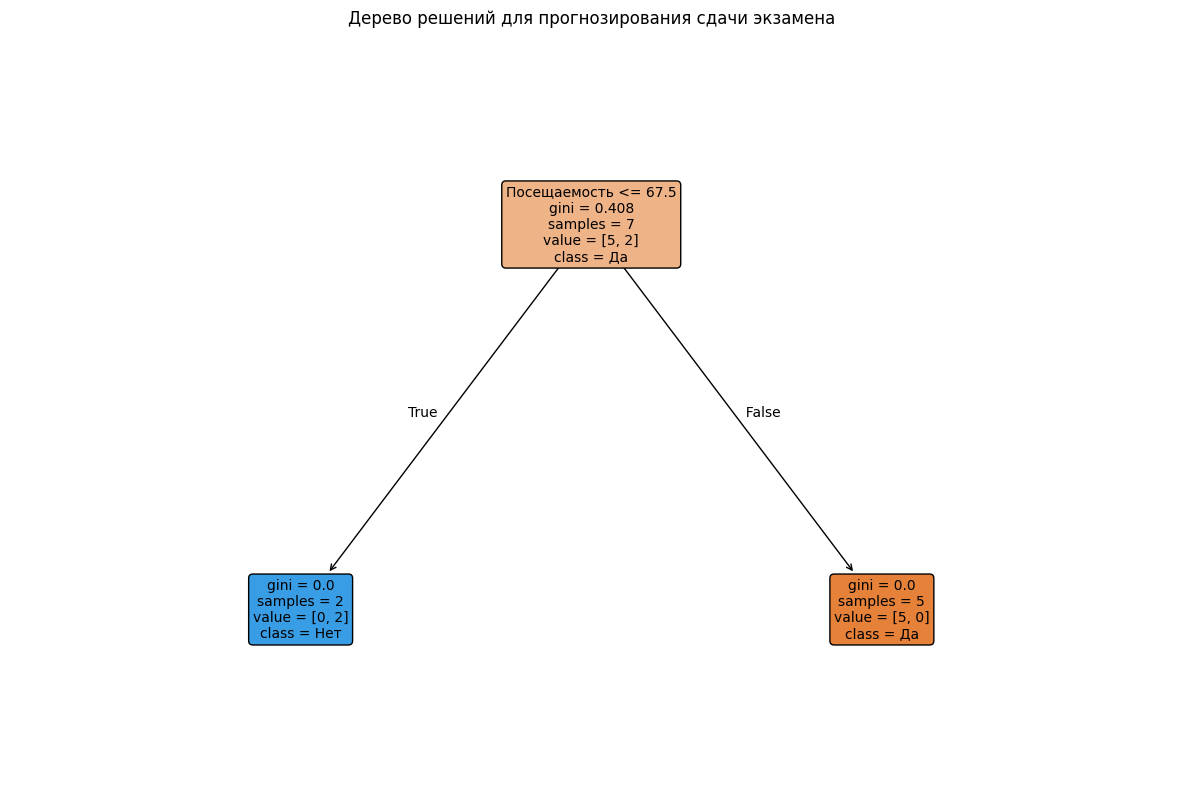

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Создаем данные
data = {
    'Посещаемость': [95, 80, 60, 90, 40, 75, 85],
    'Домашние задания': [9, 8, 3, 7, 2, 6, 8],
    'Сдал_экзамен': ['Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да']
}
df = pd.DataFrame(data)

# 2. Подготовка данных
X = df[['Посещаемость', 'Домашние задания']]
# Кодируем целевую переменную 'Да'/'Нет' в 1/0
le = LabelEncoder()
y = le.fit_transform(df['Сдал_экзамен'])

# 3. Создание и обучение модели дерева решений
# Ограничиваем глубину для наглядности
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# 4. Визуализация дерева
plt.figure(figsize=(15, 10))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Дерево решений для прогнозирования сдачи экзамена")
plt.show()
